## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

----------------------------
#### What can cause the flight delay?
* hypothesis: 
       1) weather at origin/destination airport might affect delay
       2) old make airplanes might cause delay (late aircraft) -> can't find the data, so skip this
       3) more # of passengers in the plane (or high passenger %)
       4) flight distance might cause the delay
       5) flight traffic at origin airport (other flight departure time) 


In [1]:
import pandas as pd

flights = pd.read_csv('flights_2019.csv', delimiter=',')

In [2]:
flights['arr_delay']

0         67.0
1         -3.0
2          6.0
3         14.0
4        -12.0
          ... 
119995    25.0
119996    15.0
119997     6.0
119998   -22.0
119999    14.0
Name: arr_delay, Length: 120000, dtype: float64

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [3]:
# Outlier detection: 
# IQR based filtering : Used when our data distribution is skewed.

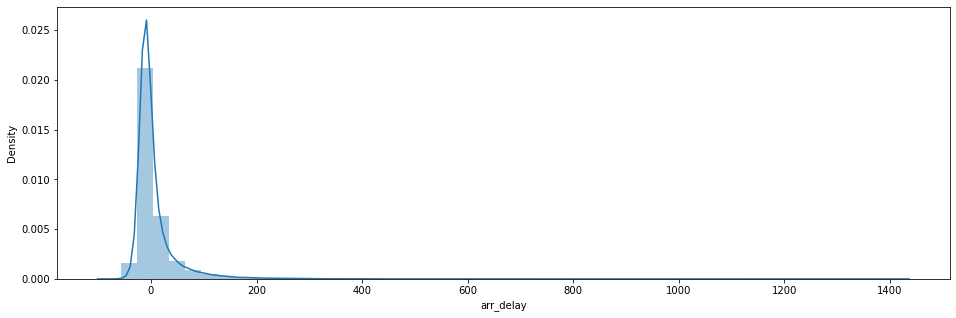

In [4]:
# Plot the distribution plot for the features
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
sns.distplot(flights['arr_delay'])
plt.show()

<AxesSubplot:xlabel='arr_delay'>

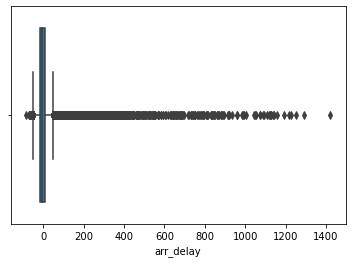

In [5]:
#Form a Box-plot for the skewed feature
sns.boxplot(flights['arr_delay'])

In [6]:
# Finding the IQR
percentile25 = flights['arr_delay'].quantile(0.25)
percentile75 = flights['arr_delay'].quantile(0.75)
iqr = percentile75 - percentile25

In [7]:
# Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [8]:
print(iqr)
print(upper_limit, lower_limit)

24.0
45.0 -51.0


In [9]:
# Finding Outliers
flights[flights['arr_delay'] > upper_limit]
flights[flights['arr_delay'] < lower_limit]

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
1030,2019-01-01,DL,DL_CODESHARE,DL,4898,OO,N813SK,4898,13487,MSP,...,1254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6209,2019-01-01,AS,AS,AS,711,AS,N224AK,711,15016,STL,...,1709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6228,2019-01-01,AS,AS,AS,747,AS,N562AS,747,12892,LAX,...,2486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6280,2019-01-01,AS,AS,AS,825,AS,N517AS,825,14057,PDX,...,2607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6283,2019-01-01,AS,AS,AS,829,AS,N559AS,829,14679,SAN,...,2541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113860,2019-12-01,DL,DL,DL,1096,DL,N819DX,1096,14747,SEA,...,2688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113982,2019-12-01,DL,DL,DL,1191,DL,N839DN,1191,12478,JFK,...,2422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114517,2019-12-01,DL,DL,DL,1619,DL,N332NB,1619,11066,CMH,...,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116053,2019-12-01,DL,DL,DL,2821,DL,N832DN,2821,14831,SJC,...,2116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Trimming
new_flights = flights[(flights['arr_delay'] < upper_limit) & (flights['arr_delay'] > lower_limit)]
new_flights.shape

(106319, 42)

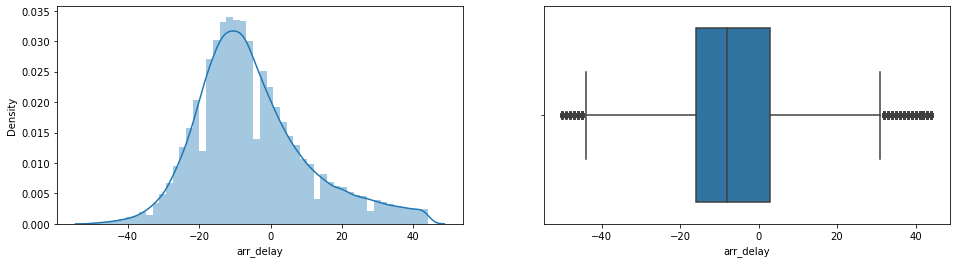

In [11]:
# Compare the plots after trimming
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(new_flights['arr_delay'])
plt.subplot(1,2,2)
sns.boxplot(new_flights['arr_delay'])

plt.show()

# Second trial with adjusting early arrival as arr_delay = 0 
 -> do not use as the result is not close to normal distribution

In [12]:
'''
# Finding the IQR
percentile25 = flights_adj['arr_delay_adj'].quantile(0.25)
percentile75 = flights_adj['arr_delay_adj'].quantile(0.75)
iqr = percentile75 - percentile25

# Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

# Finding Outliers
flights_adj[flights_adj['arr_delay_adj'] > upper_limit]
flights_adj[flights_adj['arr_delay_adj'] < lower_limit]

# Trimming
new_flights_adj = flights_adj[(flights_adj['arr_delay_adj'] < upper_limit) & (flights_adj['arr_delay_adj'] > lower_limit)]


# Compare the plots after trimming
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(new_flights_adj['arr_delay_adj'])
plt.subplot(1,2,2)
sns.boxplot(new_flights_adj['arr_delay_adj'])

plt.show()
'''

"\n# Finding the IQR\npercentile25 = flights_adj['arr_delay_adj'].quantile(0.25)\npercentile75 = flights_adj['arr_delay_adj'].quantile(0.75)\niqr = percentile75 - percentile25\n\n# Finding upper and lower limit\nupper_limit = percentile75 + 1.5 * iqr\nlower_limit = percentile25 - 1.5 * iqr\n\n# Finding Outliers\nflights_adj[flights_adj['arr_delay_adj'] > upper_limit]\nflights_adj[flights_adj['arr_delay_adj'] < lower_limit]\n\n# Trimming\nnew_flights_adj = flights_adj[(flights_adj['arr_delay_adj'] < upper_limit) & (flights_adj['arr_delay_adj'] > lower_limit)]\n\n\n# Compare the plots after trimming\nplt.figure(figsize=(16,4))\nplt.subplot(1,2,1)\nsns.distplot(new_flights_adj['arr_delay_adj'])\nplt.subplot(1,2,2)\nsns.boxplot(new_flights_adj['arr_delay_adj'])\n\nplt.show()\n"

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [13]:
import datetime as dt
new_flights['Month'] = pd.to_datetime(new_flights['fl_date']).dt.month

In [14]:
new_flights.groupby(['Month']).mean()

,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
Month,,,,,,,,,,,,,,,,,,,,,
1,2241.216381,2241.216381,12750.301400,12779.210047,1347.993888,1347.527006,2.751611,15.804957,1369.577795,1486.313403,...,773.401645,6.862566,0.805619,9.716021,0.132118,8.017464,1187.909091,16.181818,16.181818,NaN
2,2059.492548,2059.492548,12640.394351,12654.040865,1318.308894,1320.945673,2.954087,16.633293,1345.607812,1469.028846,...,774.803726,6.545382,0.531847,10.494427,0.077229,9.072452,1439.666667,12.888889,12.888889,NaN
3,2319.810446,2319.810446,12784.545255,12783.172605,1319.481840,1322.827165,3.446789,16.221031,1348.350628,1483.851608,...,715.573735,7.153025,0.409253,9.031317,0.081851,9.517438,1193.652174,16.043478,16.043478,NaN
4,2291.650407,2291.362456,12495.973304,12638.459410,1359.236136,1364.417061,5.676010,15.468026,1385.321320,1484.925009,...,853.830118,10.139179,0.033403,4.578984,0.034099,12.982603,1363.666667,20.750000,20.750000,NaN
5,2038.469218,2038.469218,12480.129543,12635.916631,1318.221783,1315.428068,0.284523,15.569153,1340.796280,1462.057717,...,825.991877,8.478437,0.335580,8.157682,0.334232,7.954178,1196.000000,11.818182,11.818182,NaN
6,2894.994153,2894.994153,12777.980324,12784.250169,1258.494378,1255.038003,0.433888,15.244434,1277.977513,1419.510681,...,873.150101,7.898876,1.210112,10.402247,0.106742,6.828090,1166.350000,14.200000,14.200000,NaN
7,2806.952085,2806.952085,12867.515844,12632.506915,1308.487858,1304.831645,-0.019057,15.636938,1329.668191,1438.954590,...,708.122945,8.180952,0.327891,8.151020,0.185034,9.261224,1453.153846,23.846154,23.846154,NaN
8,2249.198119,2249.198119,12774.702883,12737.675164,1282.961515,1284.810296,4.452419,16.381883,1308.824898,1392.624056,...,805.439921,7.848549,0.556263,8.450106,0.038924,10.478415,1077.666667,17.466667,17.466667,NaN
9,2901.880514,2901.880514,12744.475696,12735.766916,1357.017131,1351.125375,-1.921734,14.519486,1373.362206,1505.515310,...,737.584690,10.635108,0.522682,7.491124,0.011834,7.550296,1381.166667,19.444444,19.444444,NaN


### Feature engineering

In [15]:
new_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106319 entries, 1 to 119999
Data columns (total 43 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fl_date              106319 non-null  object 
 1   mkt_unique_carrier   106319 non-null  object 
 2   branded_code_share   106319 non-null  object 
 3   mkt_carrier          106319 non-null  object 
 4   mkt_carrier_fl_num   106319 non-null  int64  
 5   op_unique_carrier    106319 non-null  object 
 6   tail_num             106319 non-null  object 
 7   op_carrier_fl_num    106319 non-null  int64  
 8   origin_airport_id    106319 non-null  int64  
 9   origin               106319 non-null  object 
 10  origin_city_name     106319 non-null  object 
 11  dest_airport_id      106319 non-null  int64  
 12  dest                 106319 non-null  object 
 13  dest_city_name       106319 non-null  object 
 14  crs_dep_time         106319 non-null  int64  
 15  dep_time         

In [16]:
# Dropping non-relevant columns

new_flights = new_flights.drop(['branded_code_share','mkt_carrier','mkt_carrier_fl_num','op_unique_carrier',
                                'cancelled','cancellation_code','diverted','dup','first_dep_time', 
                                'total_add_gtime','longest_add_gtime', 'no_name', 'origin_airport_id',
                                'origin_city_name','dest_airport_id','dest_city_name', 'dep_time', 
                                'dep_delay','taxi_out', 'wheels_off', 'wheels_on', 'taxi_in','flights',
                               'fl_date','tail_num'], axis=1)
new_flights_delay = new_flights[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay']]
new_flights = new_flights.drop(['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay'], axis=1)

new_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106319 entries, 1 to 119999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   mkt_unique_carrier   106319 non-null  object 
 1   op_carrier_fl_num    106319 non-null  int64  
 2   origin               106319 non-null  object 
 3   dest                 106319 non-null  object 
 4   crs_dep_time         106319 non-null  int64  
 5   crs_arr_time         106319 non-null  int64  
 6   arr_time             106319 non-null  float64
 7   arr_delay            106319 non-null  float64
 8   crs_elapsed_time     106319 non-null  int64  
 9   actual_elapsed_time  106319 non-null  float64
 10  air_time             106319 non-null  float64
 11  distance             106319 non-null  int64  
 12  Month                106319 non-null  int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 11.4+ MB


In [17]:
# One hot encoding for origin and unique_carrier
'''
#not much relevance in origin and arrival delay(p-value is high) in linear regression 
onehot_origin = pd.get_dummies(new_flights['origin'])
new_flights = new_flights.drop('origin', axis=1)
new_flights = new_flights.join(onehot_origin)
new_flights
''' 

onehot_carrier = pd.get_dummies(new_flights['mkt_unique_carrier'])
new_flights = new_flights.drop('mkt_unique_carrier', axis=1)
new_flights = new_flights.join(onehot_carrier)

In [18]:
new_flights.head()

,op_carrier_fl_num,origin,dest,crs_dep_time,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,...,AA,AS,B6,DL,F9,G4,HA,NK,UA,WN
1,5606,MYR,CLT,2157,2311,2308.0,-3.0,74,70.0,40.0,...,1,0,0,0,0,0,0,0,0,0
2,5607,BDL,DCA,1151,1325,1331.0,6.0,94,79.0,69.0,...,1,0,0,0,0,0,0,0,0,0
3,5607,DCA,BDL,1009,1126,1140.0,14.0,77,87.0,52.0,...,1,0,0,0,0,0,0,0,0,0
4,5608,DCA,GSP,2000,2134,2122.0,-12.0,94,87.0,72.0,...,1,0,0,0,0,0,0,0,0,0
5,5610,ORF,CLT,1215,1347,1333.0,-14.0,92,88.0,66.0,...,1,0,0,0,0,0,0,0,0,0


In [20]:
import statsmodels.api as sm

#definding the variables
X = new_flights.drop(['origin','dest','arr_time','op_carrier_fl_num','arr_delay'], axis=1)
y = new_flights['arr_delay']

# adding the constant term
X = sm.add_constant(X)

# performing the regression
# and fitting the model
result = sm.OLS(y, X).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              arr_delay   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     4868.
Date:                Wed, 03 Aug 2022   Prob (F-statistic):               0.00
Time:                        00:11:24   Log-Likelihood:            -4.1540e+05
No. Observations:              106319   AIC:                         8.308e+05
Df Residuals:                  106302   BIC:                         8.310e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -5.6689    

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

#### **Task 6**: How many states cover 50% of US air traffic? 

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?